### Importing Data Sets

In [1]:
#Importing Each Labelled Dataset as a dataframe

import pandas as pd

import os

import warnings
warnings.filterwarnings("ignore")

#IMDB
os.chdir('c://Users/court/OneDrive/Desktop/WGU/D213/sentiment labelled sentences')

imdb = open('imdb_labelled.txt', 'r').read()

imdb = imdb.split('\n')

imdb = imdb[:-1]

imdb = [x.split('\t') for x in imdb]

myimdb = []

for x in imdb:
    myimdb.append(x)
    
imdb_df = pd.DataFrame(myimdb)

imdb_df.shape

(1000, 2)

In [2]:
#Amazon
amazon = open('amazon_cells_labelled.txt', 'r').read()

amazon = amazon.split('\n')

amazon = amazon[:-1]

amazon = [x.split('\t') for x in amazon]

myamazon = []

for x in amazon:
    myamazon.append(x)

amazon_df = pd.DataFrame(myamazon)

amazon_df.shape

(1000, 2)

In [3]:
#Yelp
yelp = open('yelp_labelled.txt', 'r').read()

yelp = yelp.split('\n')

yelp = yelp[:-1]

yelp = [x.split('\t') for x in yelp]

myyelp = []

for x in yelp:
    myyelp.append(x)

yelp_df = pd.DataFrame(myyelp)

yelp_df.shape

(1000, 2)

In [4]:
#Joining the dataframes
pd.set_option("max_colwidth", None)

df = pd.concat([amazon_df, imdb_df, yelp_df], ignore_index=True)

df.shape

(3000, 2)

In [5]:
#Inspecting the df

df.head(10)

,0,1
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [6]:
#Renaming Columns
df.rename(columns = {0:'Review', 1:'Sentiment'}, inplace = True)
df.head(10)

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


### Cleaning/Preprocessing df

In [7]:
#Examining data type and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     3000 non-null   object
 1   Sentiment  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [8]:
#Examining Value Counts

df['Sentiment'].value_counts()

0    1500
1    1500
Name: Sentiment, dtype: int64

In [9]:
#Identifying Characters Used in 'Review' Column


reviews = df['Review']

list_of_characters = []

for review in reviews:
    for character in review:
        if character not in list_of_characters:
            list_of_characters.append(character)

print(list_of_characters)


['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']', 'Â', '–', 'Ã', '©', '…', '¥', '—', 'ª']


In [10]:
#Transform reviews to all lowercase
df['Clean_Review'] = df['Review'].str.lower()

df[['Review', 'Clean_Review']].head(10)

,Review,Clean_Review
0,So there is no way for me to plug it in here in the US unless I go by a converter.,so there is no way for me to plug it in here in the us unless i go by a converter.
1,"Good case, Excellent value.","good case, excellent value."
2,Great for the jawbone.,great for the jawbone.
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,tied to charger for conversations lasting more than 45 minutes.major problems!!
4,The mic is great.,the mic is great.
5,I have to jiggle the plug to get it to line up right to get decent volume.,i have to jiggle the plug to get it to line up right to get decent volume.
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.","if you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one."
7,If you are Razr owner...you must have this!,if you are razr owner...you must have this!
8,"Needless to say, I wasted my money.","needless to say, i wasted my money."
9,What a waste of money and time!.,what a waste of money and time!.


In [11]:
#Removing Punctuation and Special Characters

#Removing all characters except lowercase a-z
df['Clean_Review'] = df['Clean_Review'].str.replace('[^a-z]', ' ')

#Removing extra whitespace
df['Clean_Review'] = df['Clean_Review'].str.replace(' +', ' ')
    
df[['Review', 'Clean_Review']].head(10)

,Review,Clean_Review
0,So there is no way for me to plug it in here in the US unless I go by a converter.,so there is no way for me to plug it in here in the us unless i go by a converter
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great for the jawbone
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,tied to charger for conversations lasting more than minutes major problems
4,The mic is great.,the mic is great
5,I have to jiggle the plug to get it to line up right to get decent volume.,i have to jiggle the plug to get it to line up right to get decent volume
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",if you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one
7,If you are Razr owner...you must have this!,if you are razr owner you must have this
8,"Needless to say, I wasted my money.",needless to say i wasted my money
9,What a waste of money and time!.,what a waste of money and time


In [12]:
#Checking for Characters in Clean_Review

clean_reviews = df['Clean_Review']

clean_list_of_characters = []

for review in clean_reviews:
    for character in review:
        if character not in clean_list_of_characters:
            clean_list_of_characters.append(character)

print(clean_list_of_characters)

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', 'z', 'q', 'k']


In [13]:
#Removing Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

df['Clean_Review'] = df['Clean_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df[['Review', 'Clean_Review']].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\court\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Clean_Review
0,So there is no way for me to plug it in here in the US unless I go by a converter.,way plug us unless go converter
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great jawbone
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,tied charger conversations lasting minutes major problems
4,The mic is great.,mic great
5,I have to jiggle the plug to get it to line up right to get decent volume.,jiggle plug get line right get decent volume
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",several dozen several hundred contacts imagine fun sending one one
7,If you are Razr owner...you must have this!,razr owner must
8,"Needless to say, I wasted my money.",needless say wasted money
9,What a waste of money and time!.,waste money time


In [14]:
#Lemmatization 

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def convert(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(lemmatizer.lemmatize(i)))

    return ' '.join(lemmatized_text)

df['Clean_Review'] = df['Clean_Review'].apply(lambda x: convert(x))

df[['Review', 'Clean_Review']].head(10)

,Review,Clean_Review
0,So there is no way for me to plug it in here in the US unless I go by a converter.,way plug u unless go converter
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great jawbone
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,tied charger conversation lasting minute major problem
4,The mic is great.,mic great
5,I have to jiggle the plug to get it to line up right to get decent volume.,jiggle plug get line right get decent volume
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",several dozen several hundred contact imagine fun sending one one
7,If you are Razr owner...you must have this!,razr owner must
8,"Needless to say, I wasted my money.",needle say wasted money
9,What a waste of money and time!.,waste money time


In [15]:
#Finding Vocabulary Length
import numpy as np

#Tokenize Whole df
df['Token_Review'] = df['Clean_Review']

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(df['Token_Review'])

word_index = tokenizer.word_index

vocab = len(word_index)

embedding = int(round(np.sqrt(np.sqrt(vocab)), 0))

print("The vocabulary size is: ", vocab)

print("The embedding length is: ", embedding)

The vocabulary size is:  4558
The embedding length is:  8


In [16]:
#Finding Maximum length of reviews

review_length = []

for review in df.Clean_Review:
    review_length.append(len(review.split(' ')))

max_length = int(round(np.max(review_length), 0))

print("The max length is: ", max_length)

The max length is:  44


In [17]:
#Splitting Data in Training and Testing

from sklearn.model_selection import train_test_split

x = df['Clean_Review']
y = df['Sentiment']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 19, stratify=y)


#Tokenize Training Sentences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

#Sequencing Training/Testing Sentences
training_sequences = tokenizer.texts_to_sequences(x_train)
testing_sequences = tokenizer.texts_to_sequences(x_test)


#Padding Training/Testing Sentences
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_padded = pad_sequences(training_sequences, maxlen=max_length)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

#Converting to Array

training_padded = np.array(training_padded)
training_labels = np.array(y_train, np.float32)

testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test, np.float32)

#One-Hot Encoding Labels

import tensorflow as tf

training_labels = tf.one_hot(training_labels, 2)
testing_labels = tf.one_hot(testing_labels, 2)

print(word_index)

{'<OOV>': 1, 'great': 2, 'movie': 3, 'good': 4, 'phone': 5, 'film': 6, 'one': 7, 'time': 8, 'like': 9, 'service': 10, 'work': 11, 'food': 12, 'place': 13, 'well': 14, 'really': 15, 'bad': 16, 'would': 17, 'ever': 18, 'back': 19, 'even': 20, 'also': 21, 'best': 22, 'go': 23, 'get': 24, 'love': 25, 'product': 26, 'make': 27, 'better': 28, 'could': 29, 'quality': 30, 'made': 31, 'never': 32, 'much': 33, 'use': 34, 'excellent': 35, 'sound': 36, 'headset': 37, 'thing': 38, 'way': 39, 'battery': 40, 'think': 41, 'acting': 42, 'character': 43, 'nice': 44, 'price': 45, 'look': 46, 'year': 47, 'ear': 48, 'recommend': 49, 'first': 50, 'pretty': 51, 'disappointed': 52, 'say': 53, 'got': 54, 'see': 55, 'minute': 56, 'enough': 57, 'every': 58, 'worst': 59, 'people': 60, 'case': 61, 'two': 62, 'everything': 63, 'little': 64, 'right': 65, 'piece': 66, 'still': 67, 'problem': 68, 'new': 69, 'lot': 70, 'terrible': 71, 'money': 72, 'scene': 73, 'actor': 74, 'experience': 75, 'definitely': 76, 'life': 77

In [18]:
#Example of padded sequence
print(training_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    4
 1622  731]


In [19]:
#Training Data Vocab Size, Embedding Dimension, and Input Length

vocab_size = len(word_index)

embedding_dim = int(round(np.sqrt(np.sqrt(vocab_size)), 0))

train_review_length = []

for review in x_train:
    train_review_length.append(len(review.split(' ')))

max_length = int(round(np.max(train_review_length), 0))

print("The vocabulary size of the training data is: ", len(word_index))

print("The embedding length of the training data is: ", embedding_dim)

print("The maximum sequence length of the training data is: ", max_length)


The vocabulary size of the training data is:  3871
The embedding length of the training data is:  8
The maximum sequence length of the training data is:  44


In [20]:
print("The shape of training_padded is: ", training_padded.shape)
print("The shape of training_labels is: ", training_labels.shape)

The shape of training_padded is:  (2250, 44)
The shape of training_labels is:  (2250, 2)


In [21]:
print(training_labels)

tf.Tensor(
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]], shape=(2250, 2), dtype=float32)


In [22]:
#Determining Embedding Length

from tensorflow.keras.layers import Embedding

num_words = vocab_size + 1 

embedding_dim = embedding_dim

input_length = max_length

print("The vocabularly size is: ", num_words)
print("The word embedding length is: ", embedding_dim)
print("The maximum sequence length is: ", input_length)

The vocabularly size is:  3872
The word embedding length is:  8
The maximum sequence length is:  44


### Building the Neural Network

In [23]:
#Building NN

#Instantiating Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = input_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 44, 8)             30976     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 37,028
Trainable params: 37,028
Non-trainable params: 0
____________________________________________________

In [24]:
#Fitting the model

history = model.fit(training_padded, training_labels, epochs = 50, validation_split = 0.3, callbacks=[early_stopping_monitor])

Epoch 1/50
50/50 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.4919
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5117 - val_loss: 0.6929 - val_accuracy: 0.4919
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5486 - val_loss: 0.6876 - val_accuracy: 0.5526
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.7676 - val_loss: 0.6406 - val_accuracy: 0.6356
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.8660 - val_loss: 0.5070 - val_accuracy: 0.7881
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.9079 - val_loss: 0.4563 - val_accuracy: 0.7926
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9302 - val_loss: 0.4521 - val_accuracy: 0.7985
Epoch 8/50
50/50 [==

In [25]:
#Evaluating the Model

score = model.evaluate(testing_padded, testing_labels, verbose=0)

print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.47337639331817627 / Test accuracy: 0.8066666722297668


In [26]:
#Model #2 Reduce Complexity

model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = input_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 44, 8)             30976     
                                                                 
 global_average_pooling1d_1   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 24)                216       
                                                                 
 dense_4 (Dense)             (None, 2)                 50        
                                                                 
Total params: 31,242
Trainable params: 31,242
Non-trainable params: 0
_________________________________________________________________


In [27]:
history_2 = model_2.fit(training_padded, training_labels, epochs = 50, validation_split = 0.3, callbacks=[early_stopping_monitor])

Epoch 1/50
50/50 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.4933 - val_loss: 0.6929 - val_accuracy: 0.4933
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5613 - val_loss: 0.6922 - val_accuracy: 0.5067
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.6660 - val_loss: 0.6906 - val_accuracy: 0.6563
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.7790 - val_loss: 0.6865 - val_accuracy: 0.7630
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.8343 - val_loss: 0.6793 - val_accuracy: 0.6933
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.8654 - val_loss: 0.6660 - val_accuracy: 0.7274
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.8902 - val_loss: 0.6438 - val_accuracy: 0.7807
Epoch 8/50
50/50 [==

In [28]:
score = model_2.evaluate(testing_padded, testing_labels, verbose=0)

print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.41946980357170105 / Test accuracy: 0.8053333163261414


In [29]:
#Model 3 Add Dropout Layer


model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = input_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.85),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 44, 8)             30976     
                                                                 
 global_average_pooling1d_2   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 24)                216       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 50        
                                                                 
Total params: 31,242
Trainable params: 31,242
Non-trainable params: 0
__________________________________________________

In [30]:
history_3 = model_3.fit(training_padded, training_labels, epochs = 50, validation_split = 0.3, callbacks=[early_stopping_monitor])

Epoch 1/50
50/50 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5130 - val_loss: 0.6930 - val_accuracy: 0.5126
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5219 - val_loss: 0.6929 - val_accuracy: 0.4963
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5295 - val_loss: 0.6927 - val_accuracy: 0.4933
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5416 - val_loss: 0.6922 - val_accuracy: 0.6163
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5562 - val_loss: 0.6913 - val_accuracy: 0.7037
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5714 - val_loss: 0.6902 - val_accuracy: 0.6696
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5873 - val_loss: 0.6884 - val_accuracy: 0.7185
Epoch 8/50
50/50 [==

### Model Evaluation

In [31]:
#Accuracy vs. Epoch Visualization
print(history_3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


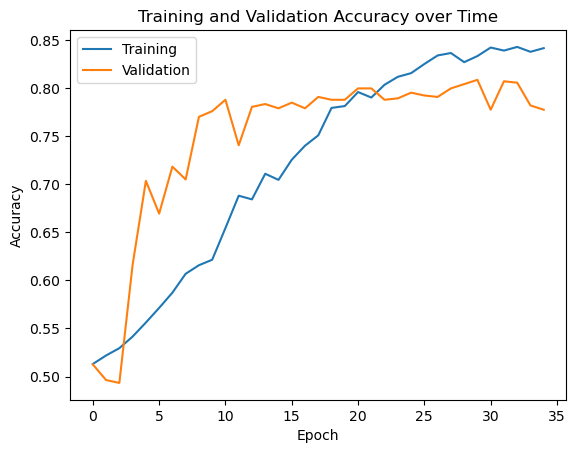

In [32]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title("Training and Validation Accuracy over Time")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

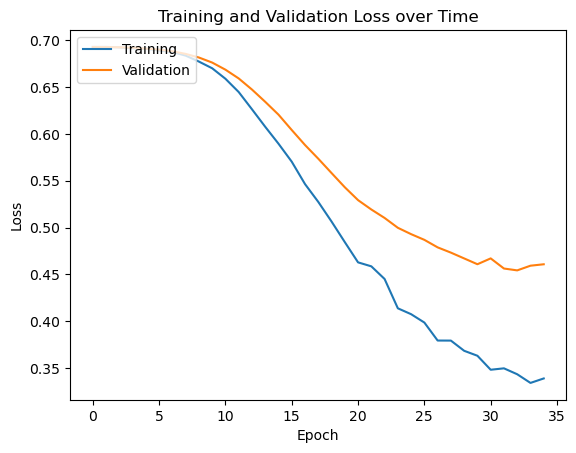

In [33]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title("Training and Validation Loss over Time")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [34]:
#Evaluation of Model

#Score:
score = model_3.evaluate(testing_padded, testing_labels, verbose=0)

print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.44043847918510437 / Test accuracy: 0.7986666560173035


### Exporting Data Files and Model

In [35]:
#Whole dataset - Cleaned

df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D213/D213 PA2/D213_PA2_clean_dataset.csv')

In [36]:
#Training and Testing Sentences

training_padded_df = pd.DataFrame(training_padded)
testing_padded_df = pd.DataFrame(testing_padded)


training_padded_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D213/D213 PA2/D213_PA2_training_sentences.csv')
testing_padded_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D213/D213 PA2/D213_PA2_testing_sentences.csv')

In [37]:
#Training and Testing Labels

training_labels_df = pd.DataFrame(training_labels)
testing_labels_df = pd.DataFrame(testing_labels)

training_labels_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D213/D213 PA2/D213_PA2_training_labels.csv')
testing_labels_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D213/D213 PA2/D213_PA2_testing_labels.csv')

In [38]:
#Saving the model
model.save('model_3.h5')